# Performance of our custom CNN on CIFAR-10

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.util import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'x-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/cifar10/87.86/log'
runlabel_default = '01'
runlabel_maxnorm = '02'
runlabel_99999 = '05'
runlabel_999 = '06'
runlabel_99 = '07'
runlabel_95 = '08'
path_default = os.path.join(log_dir, 'gui', runlabel_default)
path_maxnorm = os.path.join(log_dir, 'gui', runlabel_maxnorm)
path_99999 = os.path.join(log_dir, 'gui', runlabel_99999)
path_999 = os.path.join(log_dir, 'gui', runlabel_999)
path_99 = os.path.join(log_dir, 'gui', runlabel_99)
path_95 = os.path.join(log_dir, 'gui', runlabel_95)

In [4]:
exp_default = ExpResults(path_default, 'default', '.')
exp_maxnorm = ExpResults(path_maxnorm, 'maxnorm', '.', 'green')
exp_99999 = ExpResults(path_99999, '99.999', '.', 'brown')
exp_999 = ExpResults(path_999, '99.9', '.', 'red')
exp_99 = ExpResults(path_99, '99', '.', 'yellow')
exp_95 = ExpResults(path_95, '95', '.', 'orange')
experiments = [exp_default, exp_maxnorm, exp_999]
experiments_all = [exp_default, exp_maxnorm, exp_99999, exp_999, exp_99, exp_95]

Using Theano backend.


Using cuDNN version 5005 on context None
Mapped name None to device cuda: GeForce GTX 980 Ti (0000:01:00.0)


## Plot error vs operations

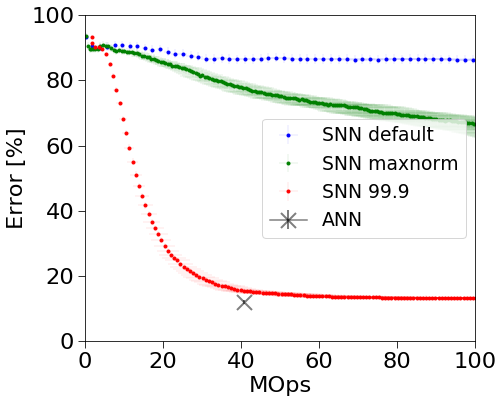

In [5]:
show_numbers = False

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

exp = experiments[2]
plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN', color='black', markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

exp = experiments[0]
if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.ylabel('Error [%]')
plt.xlabel('MOps')
plt.legend(loc='center right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [8]:
for exp in experiments[-1:]:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} GOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('')

99.9
ANN top-1:                         (40.85555 GOps/frame, 12.14 %)
SNN top-1 best error:         (147.49908 GOps/frame, 12.90 %)
SNN top-1 converged:        (60.81925 GOps/frame, 13.90 %)
SNN top-1 jointly optimal:  (29.35535 GOps/frame, 19.59 %)
SNN top-1 same op:           (41.48490 GOps/frame, 15.32 %)



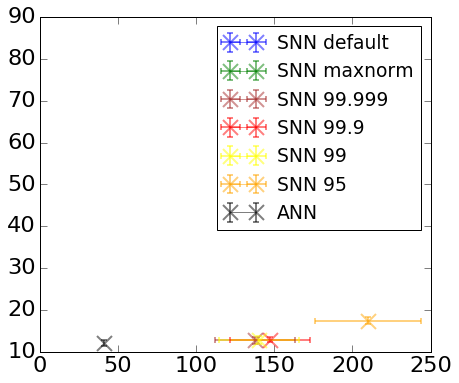

In [13]:
for exp in experiments_all:
    plt.errorbar(exp.op1_0, exp.e1_0, marker='x', label='SNN '+exp.label, color=exp.color1, markersize=15,
                 xerr=exp.std_computations_t[-1], yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
exp = experiments[2]
plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN', color='black', markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)
plt.legend()